# Homework 2
Kristina, Marion and Alexandre

In [53]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import warnings

# Global variables


In [54]:
max_rank = 200 # Keep only the first 200 universities

In [55]:
def plot_data_bar(data, ax, attr='', xdata='', title=''):
    
    ax.grid()
    if attr == 'index':
        ax.set_xlabel(data.index)
        sns.barplot(x=xdata, y=data.index, data=data, ax=ax, palette="Greens_r")
    else:
        ax.set_xlabel(data[attr])
        sns.barplot(x=xdata, y=data[attr], data=data, ax=ax, palette="Greens_r")

    ax.set_title(title, fontsize=14, fontweight='bold')
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

# First ranking - www.topuniversities.com

## Handle data

This ranking is also known as <i>QS University Ranking</i>.<br>
We see with <b>Postman</b> that a .txt file in a JSON format is loaded with the page. This file contains all universities with all the ranking informations displayed on the page.

In [56]:
URL_PATH_QS = 'https://www.topuniversities.com'
RANKING_DATA_URL_QS = URL_PATH_QS + '/sites/default/files/qs-rankings-data/357051.txt'
response_qs = requests.get(RANKING_DATA_URL_QS)  # HTTP GET request

raw_data_qs = json_normalize(response_qs.json(), 'data')
print (raw_data_qs)

     cc core_id         country  \
0    US     410   United States   
1    US     573   United States   
2    US     253   United States   
3    US      94   United States   
4    GB      95  United Kingdom   
5    GB     478  United Kingdom   
6    GB     365  United Kingdom   
7    GB     356  United Kingdom   
8    US     120   United States   
9    CH     201     Switzerland   
10   SG     431       Singapore   
11   CH     177     Switzerland   
12   US     508   United States   
13   US     143   United States   
14   SG     443       Singapore   
15   US     684   United States   
16   US     305   United States   
17   US     138   United States   
18   US     495   United States   
19   AU      40       Australia   
20   US     403   United States   
21   US     168   United States   
22   GB     180  United Kingdom   
23   GB     357  United Kingdom   
24   CN     626           China   
25   HK     268       Hong Kong   
26   US      84   United States   
27   JP     615     

In [57]:
top200_qs = raw_data_qs[: max_rank]
top200_qs

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,title,url
0,US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,Stanford University,/universities/stanford-university
2,US,253,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294270,3,North America,98.4,5,Harvard University,/universities/harvard-university
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,University of Cambridge,/universities/university-cambridge
5,GB,478,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294654,6,Europe,95.3,5,University of Oxford,/universities/university-oxford
6,GB,365,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294014,7,Europe,94.6,None,UCL (University College London),/universities/ucl-university-college-london
7,GB,356,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294030,8,Europe,93.7,None,Imperial College London,/universities/imperial-college-london
8,US,120,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294536,9,North America,93.5,5,University of Chicago,/universities/university-chicago
9,CH,201,Switzerland,"<a href=""/where-to-study/europe/switzerland/gu...","<img src=""https://www.topuniversities.com/site...",294432,10,Europe,93.3,None,ETH Zurich - Swiss Federal Institute of Techno...,/universities/eth-zurich-swiss-federal-institu...


Once we have the 200 top universities, we want to get more informations like :
- number of faculty members (international and total) 
- number of students (international and total)

These informations are not contained in the main page of the ranking, but in university details page.<br> 
Each university has a url attribute which allow us to make a GET request on each details page, in order to extract the data we need with BeautifulSoup.<br> This step can be slow because of the 200 GET requests we have to do.

In [58]:
def str_to_numeric(str):
    return int(str.replace(',',''))

def find_numbers(soup, attribute):
    try:
        div = soup.find('div', class_=attribute).find('div', class_="number")
        if div:
            return str_to_numeric(div.text)
        else:
            return 0
    except AttributeError:
        return 0

In [59]:
faculty_staff = []
international_staff = []
total_students = []
international_students = []

for i, row in top200_qs.iterrows():
    
    # Current url of the university
    url = row.url
    
    # Make to GET resquest in the details page
    response = requests.get(URL_PATH_QS + url)
    soup = BeautifulSoup(response.text, 'html.parser') # Parse HTML page with BeaufitulSoup

    # Get number of total academic faculty staff
    total_faculty = find_numbers(soup, 'total faculty')
    # Get number of international academic staff
    inter_faculty = find_numbers(soup, 'inter faculty')
    # Get number of total students
    total_student = find_numbers(soup, 'total student')
    # Get number of international students
    total_inter = find_numbers(soup, 'total inter')
    
    faculty_staff.append(total_faculty)
    international_staff.append(inter_faculty)
    total_students.append(total_student)
    international_students.append(total_inter)
    
    
# Create new dataframes before concatenate with the main one  
total_faculty_staff_df = pd.DataFrame(faculty_staff, columns=['total_faculty_staff'])
international_faculty_staff_df = pd.DataFrame(international_staff, columns=['international_faculty_staff'])
total_students_df = pd.DataFrame(total_students, columns=['total_students'])
international_students_df = pd.DataFrame(international_students, columns=['international_students'])

# Concat the new information in the raw dataframe
top200_qs = pd.concat([top200_qs, total_faculty_staff_df, international_faculty_staff_df, total_students_df, international_students_df], axis=1)
top200_qs

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,title,url,total_faculty_staff,international_faculty_staff,total_students,international_students
0,US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...,2982,1679,11067,3717
1,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,Stanford University,/universities/stanford-university,4285,2042,15878,3611
2,US,253,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294270,3,North America,98.4,5,Harvard University,/universities/harvard-university,4350,1311,22429,5266
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,California Institute of Technology (Caltech),/universities/california-institute-technology-...,953,350,2255,647
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,University of Cambridge,/universities/university-cambridge,5490,2278,18770,6699
5,GB,478,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294654,6,Europe,95.3,5,University of Oxford,/universities/university-oxford,6750,2964,19720,7353
6,GB,365,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294014,7,Europe,94.6,None,UCL (University College London),/universities/ucl-university-college-london,6345,2554,31080,14854
7,GB,356,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294030,8,Europe,93.7,None,Imperial College London,/universities/imperial-college-london,3930,2071,16090,8746
8,US,120,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294536,9,North America,93.5,5,University of Chicago,/universities/university-chicago,2449,635,13557,3379
9,CH,201,Switzerland,"<a href=""/where-to-study/europe/switzerland/gu...","<img src=""https://www.topuniversities.com/site...",294432,10,Europe,93.3,None,ETH Zurich - Swiss Federal Institute of Techno...,/universities/eth-zurich-swiss-federal-institu...,2477,1886,19815,7563


In [60]:
# Data cleaning - Keep only useful information
top200_qs = top200_qs[['title', 'country', 'region', 'total_faculty_staff', 'international_faculty_staff', 'total_students', 'international_students']]

## Compute useful ratios

Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?<br>
<i>Note: the first ratio is the numbers of student for one faculty staff</i>

In [61]:
top200_qs['staff_student_ratio'] = (top200_qs.total_students / top200_qs.total_faculty_staff)   # (a)
top200_qs['international_student_ratio'] = (top200_qs.international_students / top200_qs.total_students) # (b)

/home/kristina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/kristina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Top 10 universities

In [62]:
top10_qs_1 = top200_qs.sort_values(['staff_student_ratio'], ascending=True).head(10) # Top 10 universities - student/staff ratio
top10_qs_2 = top200_qs.sort_values(['international_student_ratio'], ascending=False).head(10) # Top 10 universities - international student ratio
top10_qs_1

,title,country,region,total_faculty_staff,international_faculty_staff,total_students,international_students,staff_student_ratio,international_student_ratio
3,California Institute of Technology (Caltech),United States,North America,953,350,2255,647,2.366212,0.286918
15,Yale University,United States,North America,4940,1708,12402,2469,2.510526,0.199081
5,University of Oxford,United Kingdom,Europe,6750,2964,19720,7353,2.921481,0.372870
4,University of Cambridge,United Kingdom,Europe,5490,2278,18770,6699,3.418944,0.356899
16,Johns Hopkins University,United States,North America,4462,1061,16146,4105,3.618557,0.254243
1,Stanford University,United States,North America,4285,2042,15878,3611,3.705484,0.227422
0,Massachusetts Institute of Technology (MIT),United States,North America,2982,1679,11067,3717,3.711268,0.335863
185,University of Rochester,United States,North America,2569,488,9636,2805,3.750876,0.291096
18,University of Pennsylvania,United States,North America,5499,1383,20639,4250,3.753228,0.205921
17,Columbia University,United States,North America,6189,913,25045,8105,4.046696,0.323617


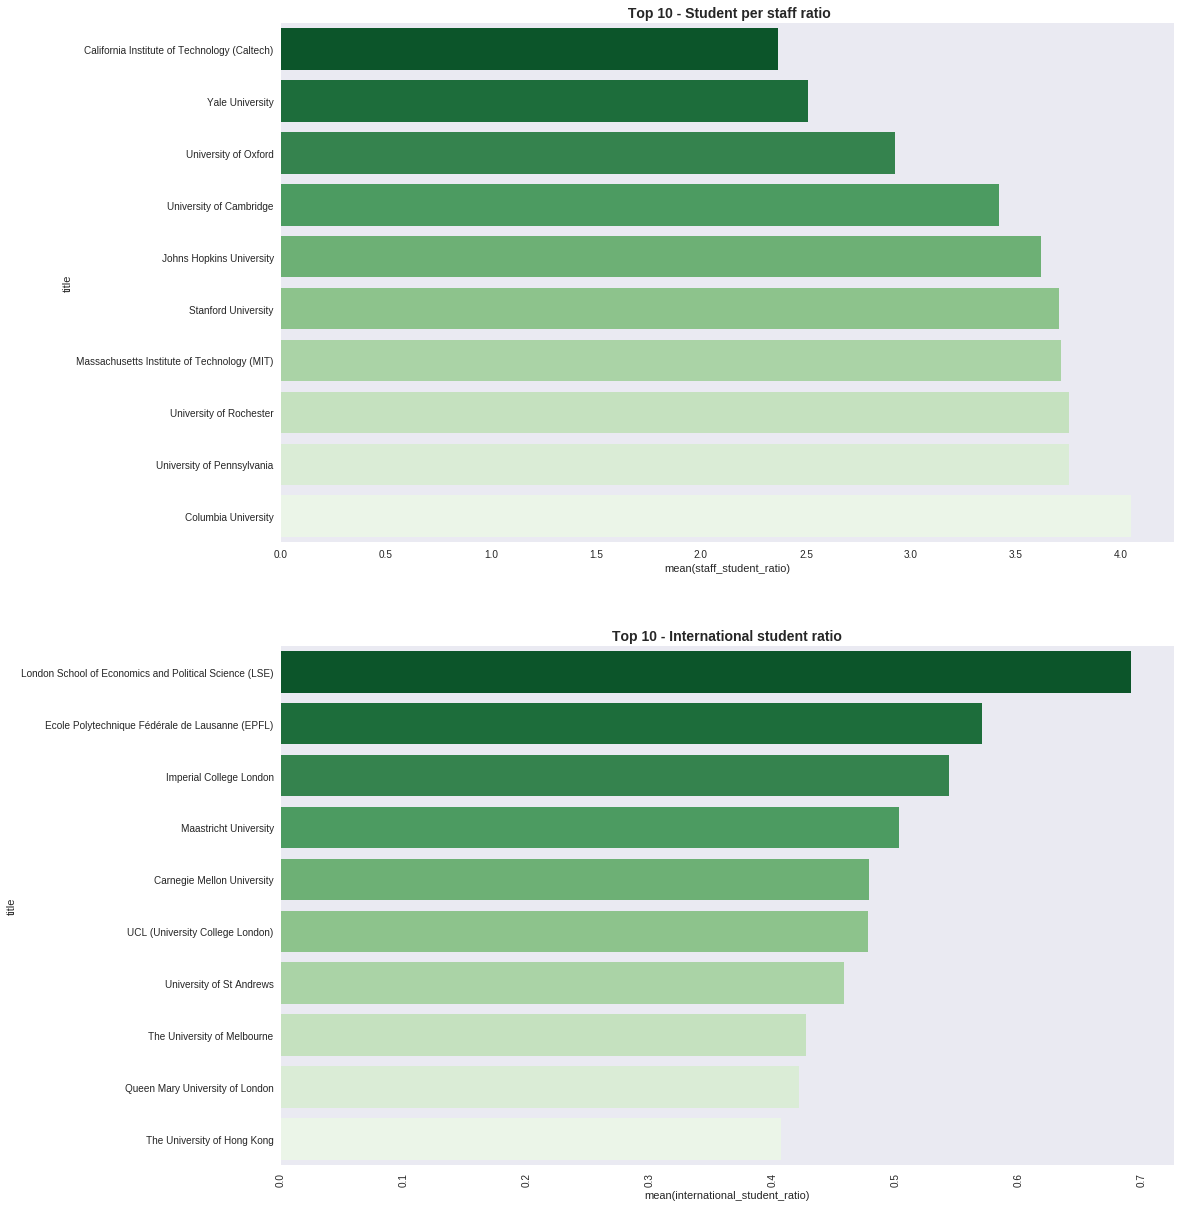

In [63]:
figure, axes = plt.subplots(2, 1, figsize=(16, 21))

plot_data_bar(top10_qs_1, axes[0], 'title', 'staff_student_ratio', ' Top 10 - Student per staff ratio')
plot_data_bar(top10_qs_2, axes[1], 'title', 'international_student_ratio', 'Top 10 - International student ratio')

#### Observations
TODO

### Top countries

In [64]:
# Group by country - mean
top200_qs_country_1 = top200_qs.groupby(['country'])[['staff_student_ratio']].mean()
top200_qs_country_top_1 = top200_qs_country_1.sort_values('staff_student_ratio', ascending=True)

# Group by country - mean
top200_qs_country_2 = top200_qs.groupby(['country'])[['international_student_ratio']].mean()
top200_qs_country_top_2 = top200_qs_country_2.sort_values('international_student_ratio', ascending=False)

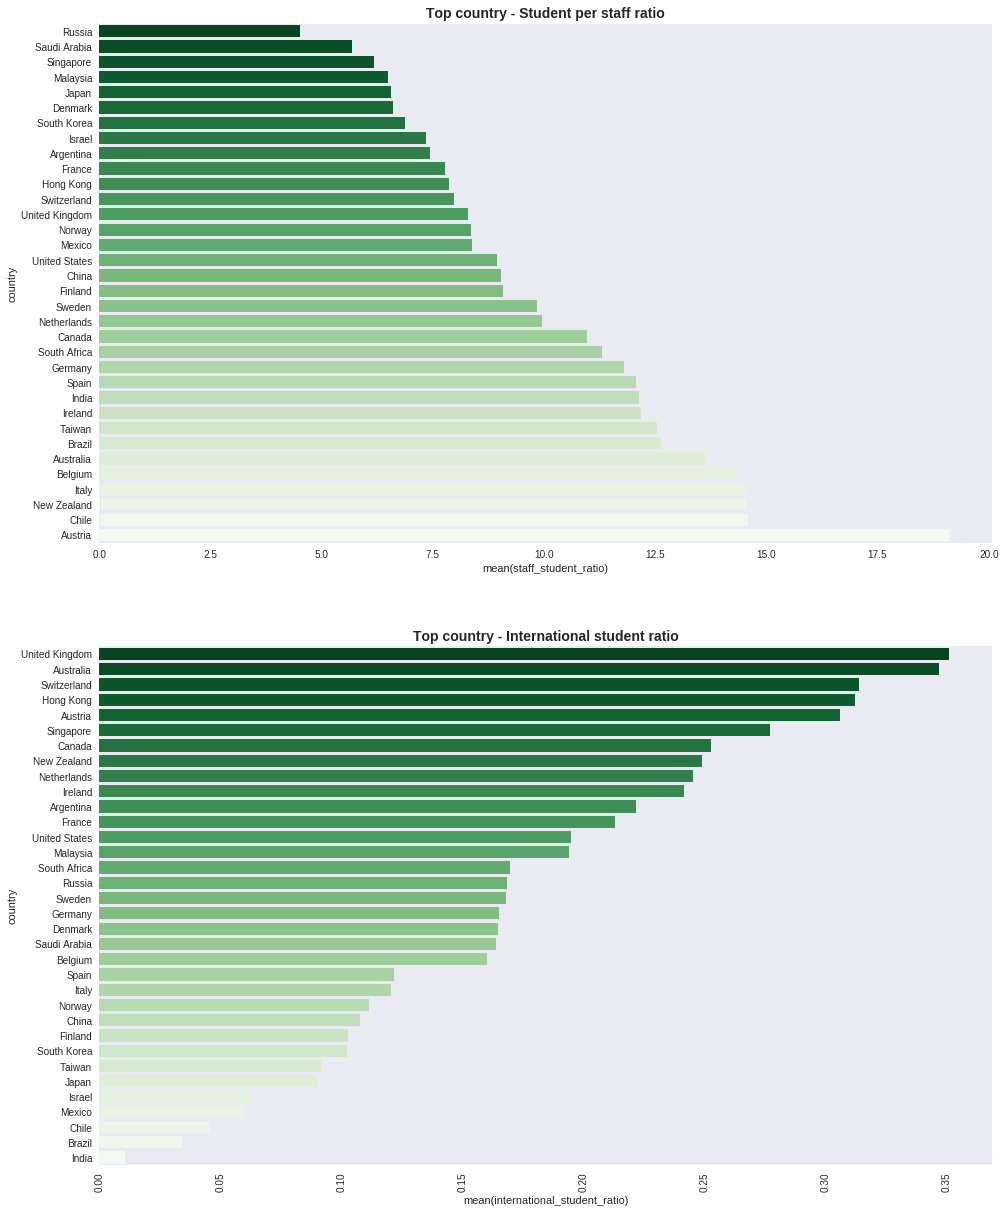

In [65]:
figure, axes = plt.subplots(2, 1, figsize=(16, 21))

plot_data_bar(top200_qs_country_top_1, axes[0], 'index', 'staff_student_ratio', 'Top country - Student per staff ratio')
plot_data_bar(top200_qs_country_top_2, axes[1], 'index', 'international_student_ratio', 'Top country - International student ratio')

#### Observations
TODO

### Top regions

In [66]:
# Group by region - mean
top200_qs_region_1 = top200_qs.groupby(['region'])[['staff_student_ratio']].mean()
top200_qs_region_top_1 = top200_qs_region_1.sort_values('staff_student_ratio', ascending=True)

# Group by region - mean
top200_qs_region_2 = top200_qs.groupby(['region'])[['international_student_ratio']].mean()
top200_qs_region_top_2 = top200_qs_region_2.sort_values('international_student_ratio', ascending=False)

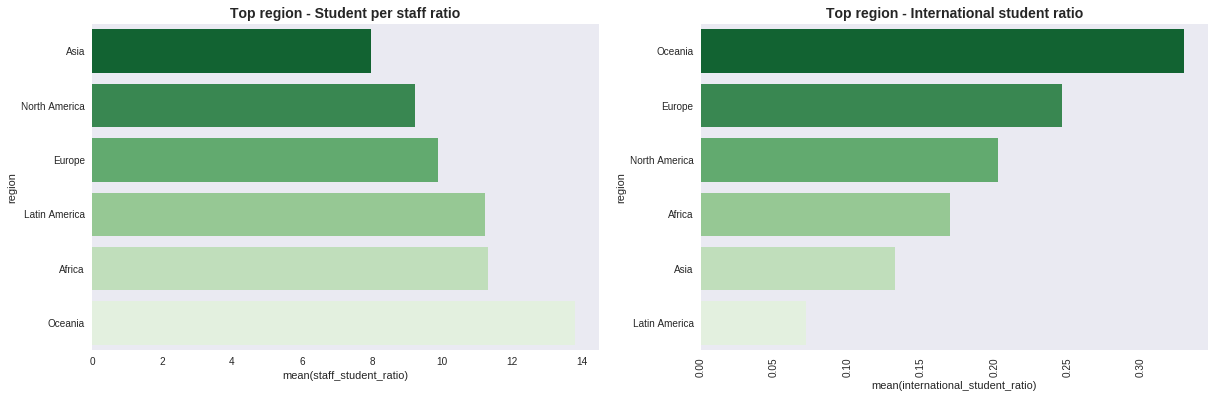

In [67]:
figure, axes = plt.subplots(1, 2, figsize=(20, 6))

plot_data_bar(top200_qs_region_top_1, axes[0], 'index', 'staff_student_ratio', 'Top region - Student per staff ratio')
plot_data_bar(top200_qs_region_top_2, axes[1], 'index', 'international_student_ratio', 'Top region - International student ratio')

#### Observations
TODO

# Second ranking - www.timeshighereducation.com

## Handle data

In [68]:
URL_PATH_THE = 'https://www.timeshighereducation.com'
RANKING_DATA_URL_THE = URL_PATH_THE + '/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
response_the = requests.get(RANKING_DATA_URL_THE)

raw_data_the = json_normalize(response_the.json(), 'data')
top200_the = raw_data_the[:max_rank]
top200_the

,aliases,location,member_level,name,nid,rank,rank_order,record_type,scores_citations,scores_citations_rank,...,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,subjects_offered,url
0,University of Oxford,United Kingdom,0,University of Oxford,468,1,10,master_account,99.1,15,...,99.5,1,86.7,5,46 : 54,"20,409",38%,11.2,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-oxford
1,University of Cambridge,United Kingdom,0,University of Cambridge,470,2,20,master_account,97.5,29,...,97.8,3,87.8,3,45 : 55,"18,389",35%,10.9,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/university-cambridge
2,California Institute of Technology caltech,United States,0,California Institute of Technology,128779,=3,30,private,99.5,10,...,97.5,4,90.3,1,31 : 69,"2,209",27%,6.5,"Architecture,Biological Sciences,Business & Ma...",/world-university-rankings/california-institut...
3,Stanford University,United States,11,Stanford University,467,=3,40,private,99.9,4,...,96.7,5,89.1,2,42 : 58,"15,845",22%,7.5,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/stanford-university
4,Massachusetts Institute of Technology,United States,0,Massachusetts Institute of Technology,471,5,50,private,100.0,1,...,91.9,9,87.3,4,37 : 63,"11,177",34%,8.7,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/massachusetts-insti...
5,Harvard University,United States,0,Harvard University,466,6,60,private,99.7,8,...,98.4,2,84.2,9,None,"20,326",26%,8.9,"Agriculture & Forestry,Archaeology,Art, Perfor...",/world-university-rankings/harvard-university
6,Princeton University,United States,0,Princeton University,469,7,70,private,99.6,9,...,93.9,6,85.7,7,45 : 55,"7,955",24%,8.3,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/princeton-university
7,Imperial College London,United Kingdom,0,Imperial College London,472,8,80,master_account,96.7,40,...,88.7,12,81.7,13,37 : 63,"15,857",55%,11.4,"Biological Sciences,Chemical Engineering,Chemi...",/world-university-rankings/imperial-college-lo...
8,University of Chicago,United States,0,University of Chicago,473,9,90,private,99.4,12,...,90.1,10,85.3,8,44 : 56,"13,525",25%,6.2,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-chicago
9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,0,ETH Zurich – Swiss Federal Institute of Techno...,479,=10,100,master_account,94.3,60,...,92.0,8,76.4,21,31 : 69,"19,233",38%,14.6,"Agriculture & Forestry,Architecture,Biological...",/world-university-rankings/eth-zurich-swiss-fe...


In [69]:
# Only keep useful informations
top200_the = top200_the[['name', 'location', 'stats_number_students', 'stats_pc_intl_students', 'stats_student_staff_ratio', 'url']]

# Make some data numeric
top200_the['stats_number_students'] = pd.to_numeric(top200_the['stats_number_students'].str.replace(',',''))
top200_the['stats_student_staff_ratio'] = pd.to_numeric(top200_the['stats_student_staff_ratio'])
top200_the['stats_pc_intl_students'] = pd.to_numeric(top200_the['stats_pc_intl_students'].str.replace('%', '')) / 100

/home/kristina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/kristina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/kristina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

## Compute useful ratios

### Top 10 universities

In [70]:
top10_the_1 = top200_the.sort_values(['stats_student_staff_ratio'], ascending=True).head(10) # Top 10 universities - student/staff ratio
top10_the_2 = top200_the.sort_values(['stats_pc_intl_students'], ascending=False).head(10) # Top 10 universities - international student ratio

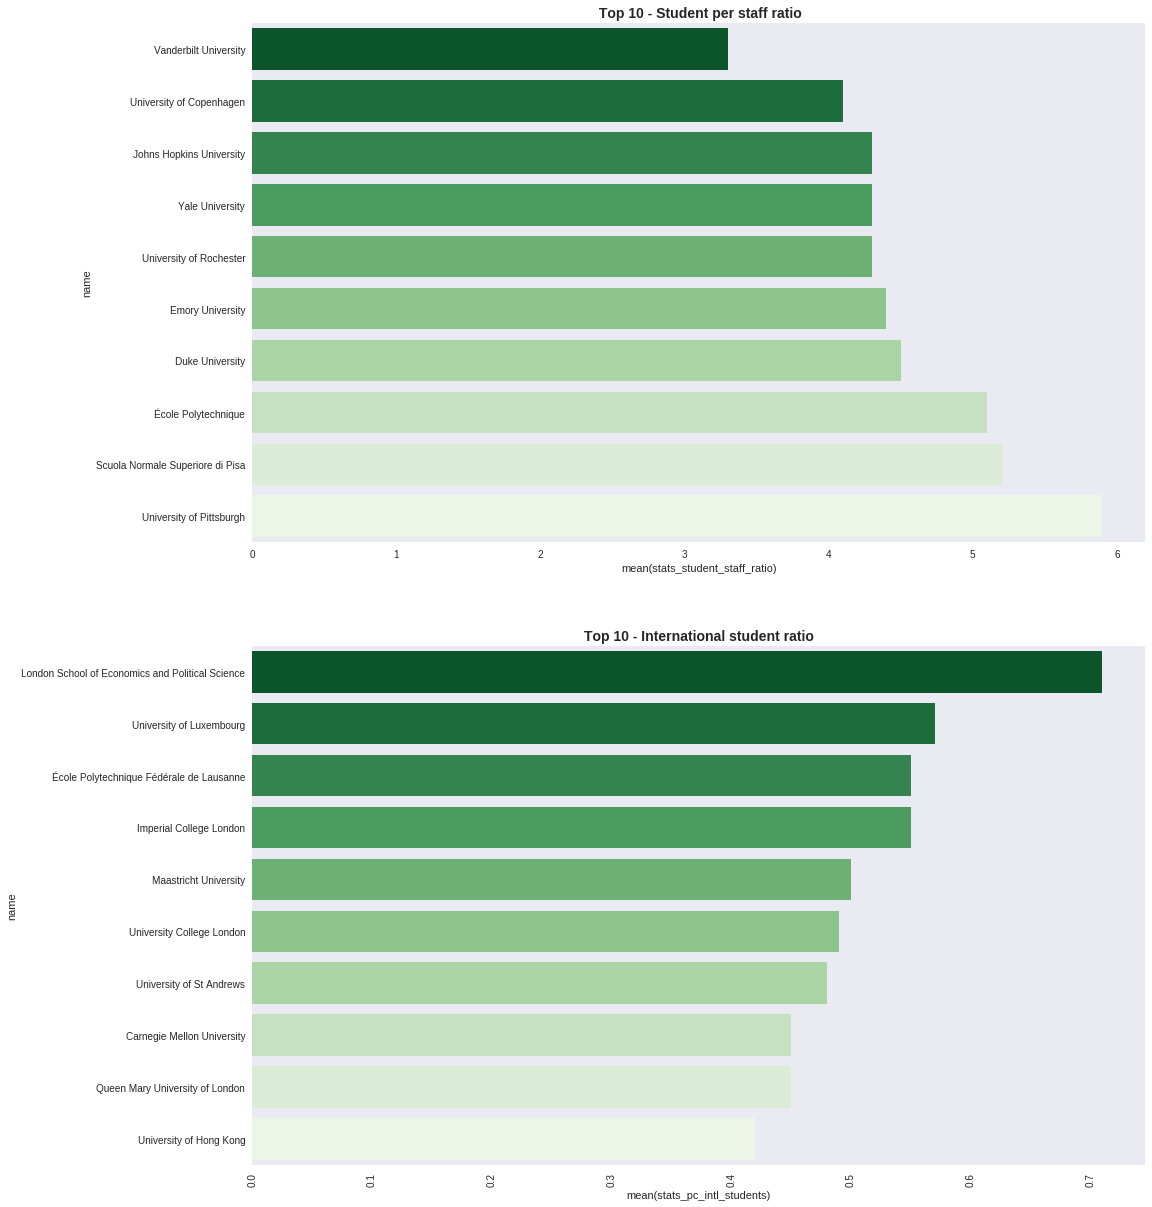

In [71]:
figure, axes = plt.subplots(2, 1, figsize=(16, 21))

plot_data_bar(top10_the_1, axes[0], 'name', 'stats_student_staff_ratio', ' Top 10 - Student per staff ratio')
plot_data_bar(top10_the_2, axes[1], 'name', 'stats_pc_intl_students', 'Top 10 - International student ratio')

#### Observations
TODO

### Top countries

In [72]:
# Group by location - mean
top200_the_country_1 = top200_the.groupby(['location'])[['stats_student_staff_ratio']].mean()
top200_the_country_top_1 = top200_the_country_1.sort_values('stats_student_staff_ratio', ascending=True)

# Group by location - mean
top200_the_country_2 = top200_the.groupby(['location'])[['stats_pc_intl_students']].mean()
top200_the_country_top_2 = top200_the_country_2.sort_values('stats_pc_intl_students', ascending=False)

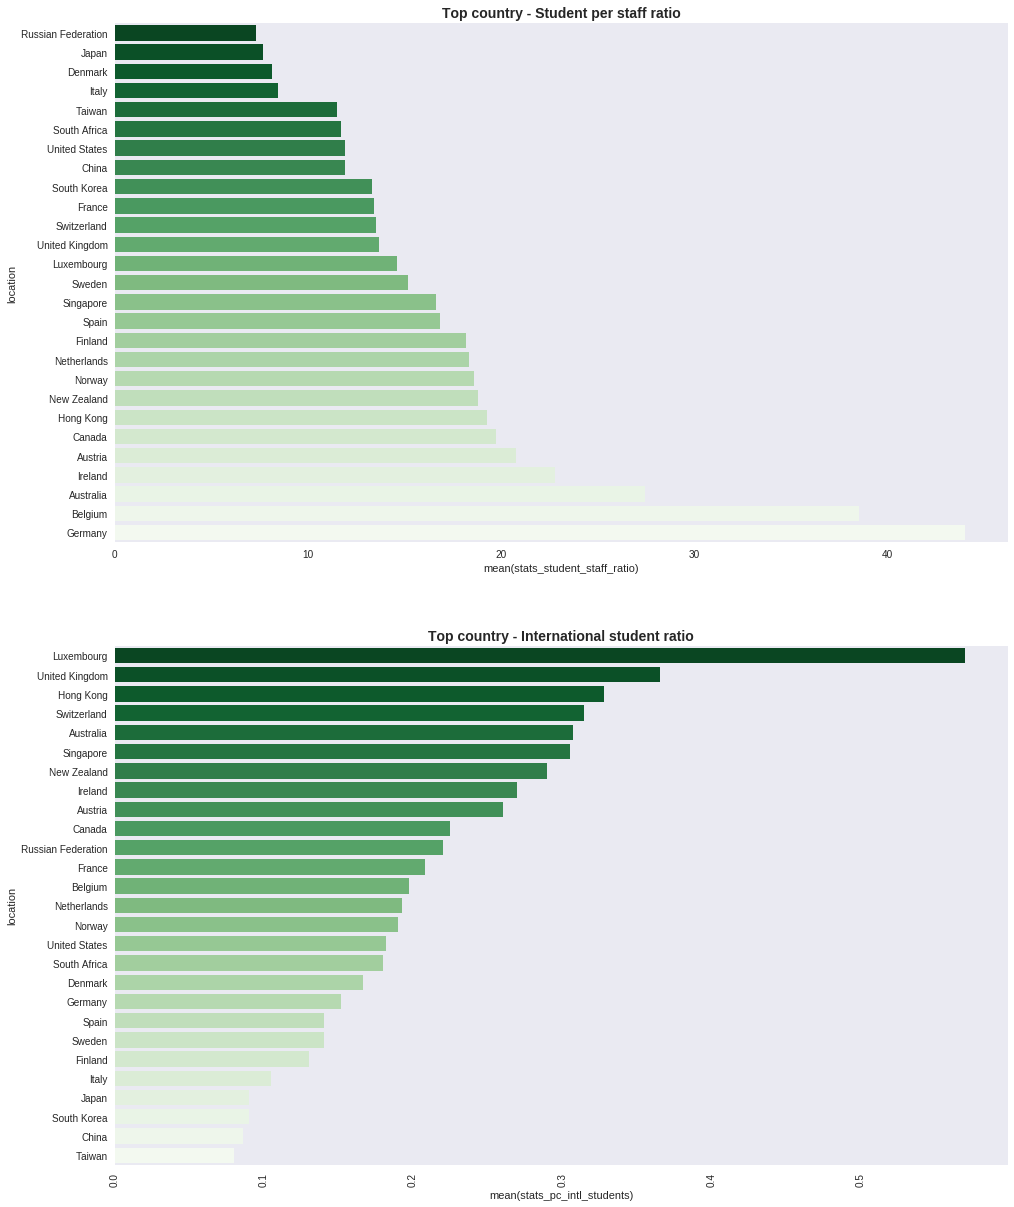

In [73]:
figure, axes = plt.subplots(2, 1, figsize=(16, 21))

plot_data_bar(top200_the_country_top_1, axes[0], 'index', 'stats_student_staff_ratio', 'Top country - Student per staff ratio')
plot_data_bar(top200_the_country_top_2, axes[1], 'index', 'stats_pc_intl_students', 'Top country - International student ratio')

#### Observations
TODO

### Top regions
As we don't have region field in our dataset, we need to get it from the previous DataFrame

In [74]:
top200_the_copy = top200_the.copy()

region_list = top200_qs.groupby(['country', 'region']).size().reset_index()
top200_the_region = pd.merge(top200_the_copy, region_list, how='left', left_on='location', right_on='country')

# Group by region - mean
top200_the_region_1 = top200_the_region.groupby(['region'])[['stats_student_staff_ratio']].mean()
top200_the_region_top_1 = top200_the_region_1.sort_values('stats_student_staff_ratio', ascending=True)

# Group by region - mean
top200_the_region_2 = top200_the_region.groupby(['region'])[['stats_pc_intl_students']].mean()
top200_the_region_top_2 = top200_the_region_2.sort_values('stats_pc_intl_students', ascending=False)

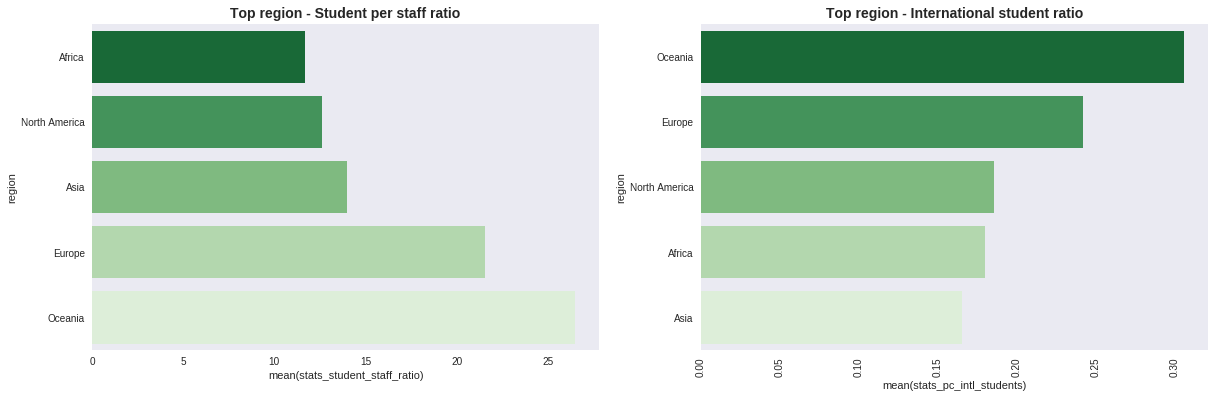

In [75]:
figure, axes = plt.subplots(1, 2, figsize=(20, 6))

plot_data_bar(top200_the_region_top_1, axes[0], 'index', 'stats_student_staff_ratio', 'Top region - Student per staff ratio')
plot_data_bar(top200_the_region_top_2, axes[1], 'index', 'stats_pc_intl_students', 'Top region - International student ratio')

#### Observations
TODO

# Merging the two Dataframes

Merge the two DataFrames created in questions 1 and 2 using university names. Match universities' names as well as you can, and explain your strategy. Keep track of the original position in both rankings.<br><br>
<b>Our strategy :</b>
- Use <i>SequenceMatcher</i> from difflib library. This class can compare two String objects. Function <i>ratio()</i> returns a float in [0, 1], measuring the similarity of the sequences. For more informations: https://docs.python.org/2/library/difflib.html 
- This ratio is computed and compared with a threshold. If the ratio is more than the threshold, we consider that the two rows are for the same university and we merge them. If the ration is less than the threshold, we simply ignore ignore them.
- Sanitize university names on both dataframes with our function <i>sanitize_data()</i> which put names to lower case and replace a list of common words like 'the', 'of', and common caracters like spaces, parenthesis, ...

In [76]:
from difflib import SequenceMatcher

def similar(a, b):
    a = a.lower()
    b = b.lower()
    
    return SequenceMatcher(None, a, b)

def sanitize_data(c):
    return c.str.lower(). \
    str.replace('universitat','university'). \
    str.replace('universitaet','university'). \
    str.replace('universidad', 'university'). \
    str.replace('universite','university'). \
    str.replace('technische','technology'). \
    str.replace('institute',''). \
    str.replace('science',''). \
    str.replace(r'\(.*\)', ''). \
    str.replace('the ',''). \
    str.replace(' of ',''). \
    str.replace(' at ',''). \
    str.replace(' de ',''). \
    str.replace(' et ',''). \
    str.replace(' and ',''). \
    str.replace(r',|\.',''). \
    str.replace(' ',''). \
    str.replace('\'','')

In [99]:
# Make of copy to be sure
top200_qs_cp = top200_qs.copy()
top200_the_cp = top200_the.copy()

# We consider to use the order defined in the webpage (index) as rank when we have ties
top200_qs_cp['rank_1'] = top200_qs_cp.index + 1
top200_the_cp['rank_2'] = top200_the_cp.index + 1

# Sanitize data and put the nameId generated in a column
top200_qs_cp['name_id'] = sanitize_data(top200_qs_cp.title)
top200_the_cp['name_id'] = sanitize_data(top200_the_cp.name)

In [100]:
for i, row in top200_qs_cp.copy().iterrows():
    max_accuracy = -1.
    accurate_name = 'NaN'
    for name in top200_the_cp.name_id:
        accuracy = similar(row.name_id, name).ratio()
        if (accuracy > max_accuracy) & (accuracy > 0.85):
            max_accuracy = accuracy
            accurate_name = name
            
    top200_qs_cp.at[i, 'max_accuracy'] = max_accuracy
    top200_qs_cp.at[i, 'name_id'] = accurate_name

We can now merge the two dataframes with same <i>name_id</i>

In [169]:
#final_top200 = pd.merge(top200_qs_cp, top200_the_cp, left_on='name_id', right_on='name_id')
final_top200 = pd.merge(top200_qs_cp, top200_the_cp, how='left')
#final_top200
print ("Shapes: ", top200_qs_cp.shape, "  ", top200_the_cp.shape)
print ("Shape: ", final_top200.shape)

nan_name_id_qs = top200_qs_cp[top200_qs_cp['name_id']=='NaN']
nan_name_id_the = top200_the_cp[top200_the_cp['name_id']=='NaN']

print ("QS Ranking - Number of values with NaN name_id ", len(nan_name_id_qs))
print ("The ranking - Number of values with NaN name_id ", len(nan_name_id_the))

top200_qs_cp.loc[:, 'name_id'] = sanitize_data(top200_qs_cp.title)
top200_the_cp.loc[:, 'name_id'] = sanitize_data(top200_the_cp.name)

#nan_name_id_qs

final_top200

Shapes:  (200, 12)    (200, 8)
Shape:  (200, 19)
QS Ranking - Number of values with NaN name_id  0
The ranking - Number of values with NaN name_id  0


,title,country,region,total_faculty_staff,international_faculty_staff,total_students,international_students,staff_student_ratio,international_student_ratio,rank_1,name_id,max_accuracy,name,location,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,url,rank_2
0,Massachusetts Institute of Technology (MIT),United States,North America,2982,1679,11067,3717,3.711268,0.335863,1,massachusettstechnology,1.000000,Massachusetts Institute of Technology,United States,11177.0,0.34,8.7,/world-university-rankings/massachusetts-insti...,5.0
1,Stanford University,United States,North America,4285,2042,15878,3611,3.705484,0.227422,2,stanforduniversity,1.000000,Stanford University,United States,15845.0,0.22,7.5,/world-university-rankings/stanford-university,4.0
2,Harvard University,United States,North America,4350,1311,22429,5266,5.156092,0.234785,3,harvarduniversity,1.000000,Harvard University,United States,20326.0,0.26,8.9,/world-university-rankings/harvard-university,6.0
3,California Institute of Technology (Caltech),United States,North America,953,350,2255,647,2.366212,0.286918,4,californiatechnology,1.000000,California Institute of Technology,United States,2209.0,0.27,6.5,/world-university-rankings/california-institut...,3.0
4,University of Cambridge,United Kingdom,Europe,5490,2278,18770,6699,3.418944,0.356899,5,universitycambridge,1.000000,University of Cambridge,United Kingdom,18389.0,0.35,10.9,/world-university-rankings/university-cambridge,2.0
5,University of Oxford,United Kingdom,Europe,6750,2964,19720,7353,2.921481,0.372870,6,universityoxford,1.000000,University of Oxford,United Kingdom,20409.0,0.38,11.2,/world-university-rankings/university-oxford,1.0
6,UCL (University College London),United Kingdom,Europe,6345,2554,31080,14854,4.898345,0.477928,7,ucl,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Imperial College London,United Kingdom,Europe,3930,2071,16090,8746,4.094148,0.543567,8,imperialcollegelondon,1.000000,Imperial College London,United Kingdom,15857.0,0.55,11.4,/world-university-rankings/imperial-college-lo...,8.0
8,University of Chicago,United States,North America,2449,635,13557,3379,5.535729,0.249244,9,universitychicago,1.000000,University of Chicago,United States,13525.0,0.25,6.2,/world-university-rankings/university-chicago,9.0
9,ETH Zurich - Swiss Federal Institute of Techno...,Switzerland,Europe,2477,1886,19815,7563,7.999596,0.381681,10,ethzurich-swissfederaltechnology,0.885714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory analysis

## Correlations

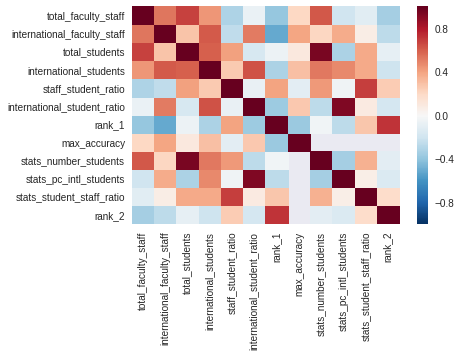

In [170]:
#We can see correlation between columns
import seaborn as sns

corr = final_top200.select_dtypes(['number']).rank().corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Attraction of universities - Faculty staff members
We note in the correlation plot a negative correlation between the number of international faculty members and the rank of the university. This means that, the more international faculty members a university has, the higher it tends to score on the rankings. The rank of a university tends to attract people all around the world.

In [171]:
final_top200[['rank_1', 'international_faculty_staff']].corr()

,rank_1,international_faculty_staff
rank_1,1.000000,-0.531141
international_faculty_staff,-0.531141,1.000000


Then, we estimate and plot a regression model relating to the rank and the number of faculty staff members.

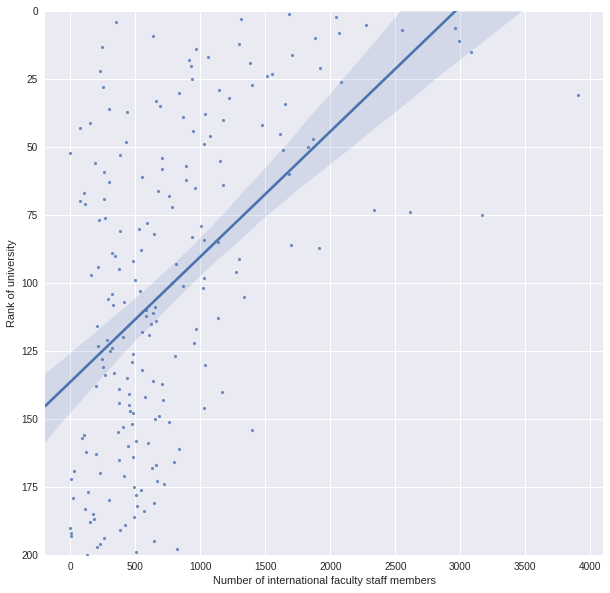

In [172]:
figure, axes = plt.subplots(figsize=(10, 10))

sns.regplot('international_faculty_staff', 'rank_1', data=final_top200, fit_reg=True, scatter_kws={"marker": 'D', "s": 10})
plt.ylim((0,200))
plt.gca().invert_yaxis()
plt.xlabel('Number of international faculty staff members')
plt.ylabel('Rank of university')

### Attraction of universities - International students ratio

We note in the correlation plot a negative correlation between the ratio of international students and the rank of the university. This means that, the higher the percentage of international students a university has, the higher it tends to score on the rankings.

In [174]:
final_top200[['rank_1', 'international_student_ratio']].rank().corr()

,rank_1,international_student_ratio
rank_1,1.000000,-0.363011
international_student_ratio,-0.363011,1.000000


Then, we estimate and plot a regression model relating to the rank and the ratio of international students. We can notice that there is a high variance when the rank approch 1: we have to consider the results carefully.

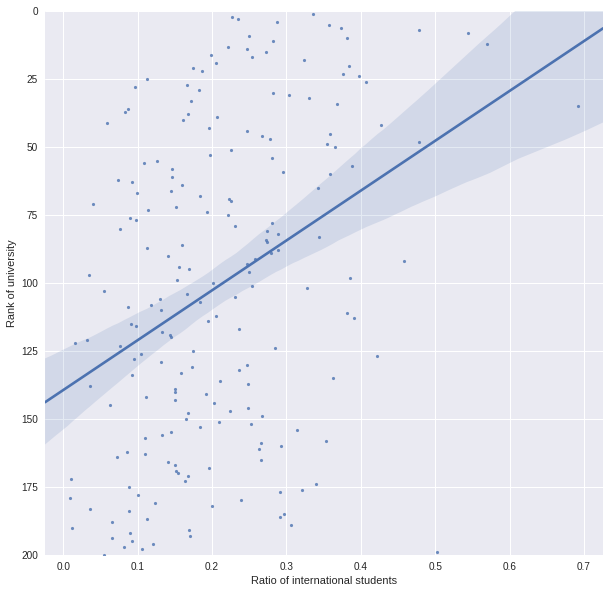

In [173]:
figure, axes = plt.subplots(figsize=(10, 10))

sns.regplot('international_student_ratio', 'rank_1', data=final_top200, fit_reg=True, scatter_kws={"marker": 'D', "s": 10})
plt.ylim((0,200))
plt.gca().invert_yaxis()
plt.xlabel('Ratio of international students')
plt.ylabel('Rank of university')

### Difference between rankings
First, we see a high correlation between the two ranks.

In [175]:
#Trying to see correlation between ranks
final_top200[['rank_1', 'rank_2']].rank().corr()

,rank_1,rank_2
rank_1,1.00000,0.72265
rank_2,0.72265,1.00000


It is interesting to see some statistic values:<br>
- On average, the two rankings agree with each other because the mean is closed to zero.
- The mean is closed to zero too
- However, the standard deviation is quite large : that means a university can have a very high score in one ranking, and a very bad score in another one.

In [176]:
final_top200['diff_rank'] = final_top200['rank_1'] - final_top200['rank_2']
final_top200.diff_rank.describe()

count    140.000000
mean       0.414286
std       42.972299
min     -127.000000
25%      -21.500000
50%        0.500000
75%       24.000000
max      107.000000
Name: diff_rank, dtype: float64

We plot a box that representing theses values.

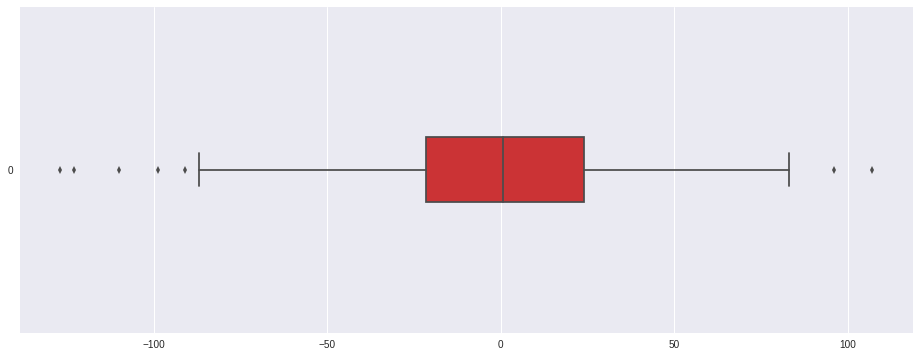

In [177]:
figure, axes = plt.subplots(figsize=(16, 6))
sns.boxplot(data=final_top200['diff_rank'], orient='h', palette="Set1", width=0.2)

# Choosing the best university

Our approch:

In [178]:
fiability_1 = 0.6
fiability_2 = 0.4

final_top200_ratio = final_top200.copy()
final_top200_ratio['rank_ratio'] = fiability_1 * (final_top200_ratio.rank_1 / final_top200_ratio.size) + fiability_2 * (final_top200_ratio.rank_2 / final_top200_ratio.size)

cc = final_top200_ratio.sort_values('rank_ratio').reset_index(drop=True)
cc.index += 1

In [179]:
#Final TOP200 with my assumtions
cc[['title']]

,title
1,Massachusetts Institute of Technology (MIT)
2,Stanford University
3,California Institute of Technology (Caltech)
4,University of Cambridge
5,University of Oxford
6,Harvard University
7,Imperial College London
8,University of Chicago
9,Princeton University
10,Yale University


# Another method to compute the final ranking

For the final ranking, we will take in consideration 4 values, the rank in the first ranking, the rank in the second ranking, the rank in the international ranking that we did and the rank in the student per staff ranking that we also did.

In [180]:
weight_inter_students = 0.2
weight_staff = 0.2
weight_ranking1 = 0.3
weight_ranking2 = 0.3

final_top200_inter = final_top200.copy()

# for staff and international students ratio, we do the mean between the values of the two rankings
final_top200_inter['staff_student_ratio_mean'] = (final_top200['staff_student_ratio'] + final_top200['stats_student_staff_ratio']) / 2
final_top200_inter['international_student_ratio_mean'] = (final_top200['international_student_ratio'] + final_top200['stats_pc_intl_students']) / 2

# add a column to have the rank in the ranking of students per staff ranking
ranking_staff = final_top200_inter.sort_values(['staff_student_ratio_mean'], ascending=True).reset_index(drop=True)
ranking_staff.index += 1
ranking_staff['staff_rank'] = ranking_staff.index

# add a column to have the rank in the ranking of international students
ranking_inter = ranking_staff.sort_values(['international_student_ratio_mean'], ascending=False).reset_index(drop=True)
ranking_inter.index += 1
ranking_inter['inter_rank'] = ranking_staff.index

final_top200_ratio = ranking_inter.copy()

# computation of the final value to evaluate university
final_top200_ratio['rank_ratio'] = weight_ranking1 * ranking_inter.rank_1 + weight_ranking2 * ranking_inter.rank_2 + weight_inter_students * ranking_inter.inter_rank + weight_staff * ranking_inter.staff_rank
cc = final_top200_ratio.sort_values('rank_ratio').reset_index(drop=True)
cc.index += 1

cc

,title,country,region,total_faculty_staff,international_faculty_staff,total_students,international_students,staff_student_ratio,international_student_ratio,rank_1,...,stats_pc_intl_students,stats_student_staff_ratio,url,rank_2,diff_rank,staff_student_ratio_mean,international_student_ratio_mean,staff_rank,inter_rank,rank_ratio
1,University of Oxford,United Kingdom,Europe,6750,2964,19720,7353,2.921481,0.372870,6,...,0.38,11.2,/world-university-rankings/university-oxford,1.0,5.0,7.060741,0.376435,23,12,9.1
2,Massachusetts Institute of Technology (MIT),United States,North America,2982,1679,11067,3717,3.711268,0.335863,1,...,0.34,8.7,/world-university-rankings/massachusetts-insti...,5.0,-4.0,6.205634,0.337932,17,24,10.0
3,University of Cambridge,United Kingdom,Europe,5490,2278,18770,6699,3.418944,0.356899,5,...,0.35,10.9,/world-university-rankings/university-cambridge,2.0,3.0,7.159472,0.353450,24,17,10.3
4,Imperial College London,United Kingdom,Europe,3930,2071,16090,8746,4.094148,0.543567,8,...,0.55,11.4,/world-university-rankings/imperial-college-lo...,8.0,0.0,7.747074,0.546784,28,2,10.8
5,California Institute of Technology (Caltech),United States,North America,953,350,2255,647,2.366212,0.286918,4,...,0.27,6.5,/world-university-rankings/california-institut...,3.0,1.0,4.433106,0.278459,5,42,11.5
6,Columbia University,United States,North America,6189,913,25045,8105,4.046696,0.323617,18,...,0.32,6.1,/world-university-rankings/columbia-university,14.0,4.0,5.073348,0.321809,8,26,16.4
7,Stanford University,United States,North America,4285,2042,15878,3611,3.705484,0.227422,2,...,0.22,7.5,/world-university-rankings/stanford-university,4.0,-2.0,5.602742,0.223711,13,71,18.6
8,Harvard University,United States,North America,4350,1311,22429,5266,5.156092,0.234785,3,...,0.26,8.9,/world-university-rankings/harvard-university,6.0,-3.0,7.028046,0.247393,22,60,19.1
9,University of Chicago,United States,North America,2449,635,13557,3379,5.535729,0.249244,9,...,0.25,6.2,/world-university-rankings/university-chicago,9.0,0.0,5.867864,0.249622,15,56,19.6
10,Johns Hopkins University,United States,North America,4462,1061,16146,4105,3.618557,0.254243,17,...,0.24,4.3,/world-university-rankings/johns-hopkins-unive...,13.0,4.0,3.959278,0.247121,2,61,21.6
